# No noise, potential stuck in bad optima

In [1]:
from utils import GEM_expectation
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [12]:
def degen(method, topicroot, iterations, ax):
    """
    Inputs:
        method: "thdp" or "nhdp"
        topicroot: "thdp_K100_T10_D20_wiki10k_wiki1k", for instance
        iterations: "[100, 200, 300]", for instance
        ax: where to plot
    Outputs:
        interpret the expected topic proportions as a distribution over 
        topics; plot the entropy and the top two differences for different
        number of mini-batches in iterations
    """
    ents = []
    top2diff = []
    
    for t in iterations:
        # testlambda = np.loadtxt(topicroot + "/lambda-" + str(t) + ".dat")
        testa = np.loadtxt(topicroot + "/a-" + str(t) + ".dat")
        if (method == "thdp"):
            testb = np.loadtxt(topicroot + "/b-" + str(t) + ".dat")
            probs = GEM_expectation(testa[np.newaxis,:],testb[np.newaxis,:]).flatten()
        elif (method == "nhdp"):
            probs = testa/np.sum(testa)
        # sort topics first by probs
        idx = [i for i in reversed(np.argsort(probs))]
        probs = probs[idx]
        # entropy
        ents.append(entropy(probs))
        # top2diff
        top2diff.append(probs[0]-probs[1])
        
    ax.plot(iterations,ents,label='Entropy',marker='o')
    ax.plot(iterations,top2diff,label='top2diff',marker='o')
    ax.set_xlabel("Number of mini-batches")
    ax.set_title(method)
    ax.legend()
    
    return

## Cold-start degeneracy

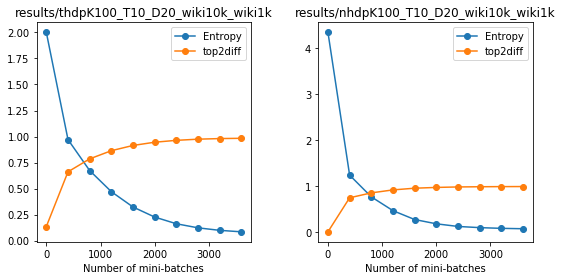

In [3]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
degen("thdp", "results/thdpK100_T10_D20_wiki10k_wiki1k", range(0,4000,400), axes[0])
degen("nhdp", "results/nhdpK100_T10_D20_wiki10k_wiki1k", range(0,4000,400), axes[1])
plt.tight_layout()
plt.show()

## Warm-start degenerate

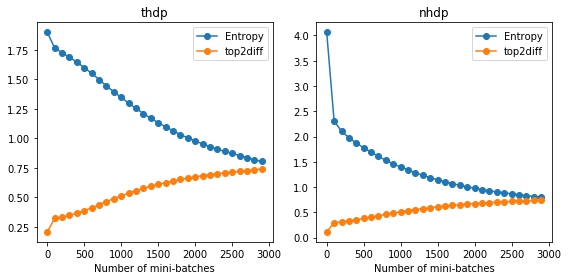

In [14]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
degen("thdp", "results/thdpK100_T10_D50_wiki10k_wiki1k/tau1024,0_kappa0,7/warm/ldaK100_D50_wiki10k_wiki1k/lambda-100", \
      range(0,3000,100), axes[0])
degen("nhdp", "results/nhdpK100_T10_D50_wiki10k_wiki1k/tau1024,0_kappa0,7/warm/ldaK100_D50_wiki10k_wiki1k/lambda-100", \
      range(0,3000,100), axes[1])
plt.tight_layout()
plt.show()

## Degenerate $\zeta$ from E-step
The rows of $\zeta$ are the topic-to-topic distributions. On some documents, the topic $k$ with the highest probability can have weight $1$ across all $T$.

# Purposefully add noise to escape local maxima

## Wang's onlinehdp.py 
The sufficient statistics to update topics, m_var_beta_ss, is randomly perturbed. For each topic k, find a vector whose magnitude should roughly be the same as m_var_beta_ss[k]. Let the amount of perturbation be large initially (mu = mu0 *1000.0 / (self.m_updatect + 1000)) where mu0 is some small number.

# Change the forgetting rate